# Research question 2

## Columns values check

In [0]:
from pyspark.sql.types import *
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

spark = SparkSession.builder.getOrCreate()

profiles = spark.read.parquet('/linkedin/people')

In [0]:
interesting_columns = [
    'about',
    'certifications',
    'current_company.name',
    'current_company.industry',
    'current_company.title',
    'education.degree',  # Level of degree (+)
    'education.field',  # Importent for measurement ! (+)
    'education.title',  # University name (+)
    'educations_details',
    'experience.company',  # company name
    'experience.description', # very importent for measurement !!! (+)
    'experience.positions.description', # very importent for measurement !!! (+)
    'experience.positions.title', # very importent for measurement !!! (+)
    'experience.positions.subtitle', # Importent for measurement !!! (+)
    'languages',  # Good for measurement, but not enough data
    'position',  # position title (+)
    'recommendations',  # Good for measurement, but not enough data (-)
    'volunteer_experience',  # Good for measurement, but not enough data (-)
     'сourses'  # Good for measurement, but not enough data (-)
]


column_statistics = {}

#### Check columns missing data ratio

In [0]:
total_rows = profiles.count()
for column_name in interesting_columns:
    not_null_percent = (profiles.filter(profiles[column_name].isNotNull()).count() / total_rows) * 100
    print(f"'{column_name}' : {not_null_percent:.2f} %")

'about' : 21.04 %
'certifications' : 100.00 %
'current_company.name' : 63.14 %
'current_company.industry' : 63.14 %
'current_company.title' : 96.30 %
'education.degree' : 100.00 %
'education.field' : 100.00 %
'education.title' : 100.00 %
'educations_details' : 42.51 %
'experience.company' : 100.00 %
'experience.description' : 100.00 %
'experience.positions.description' : 100.00 %
'experience.positions.title' : 100.00 %
'experience.positions.subtitle' : 100.00 %
'languages' : 100.00 %
'position' : 96.30 %
'recommendations' : 100.00 %
'volunteer_experience' : 100.00 %
'сourses' : 100.00 %


In [0]:
# Check about column
column_name = 'about'
not_null_percent = (profiles.filter((profiles[column_name] != "") & (profiles[column_name].isNotNull())).count() / total_rows) 
column_statistics[column_name] =  round(not_null_percent, 4)

# Check certifications column
not_empty_count = profiles.filter("size(certifications) > 0").count()
not_empty_percentage = (not_empty_count / total_rows)
column_statistics['certifications'] =  round(not_empty_percentage, 4)

# Check current_company.industry column
column_name = 'current_company.industry'
not_null_percent = (profiles.filter(profiles[column_name].isNotNull()).count() / total_rows)
column_statistics['current_company.elem'] =  round(not_null_percent, 4)

# Check education column
from pyspark.sql.functions import size
not_empty_education = profiles.filter(profiles['education'].isNotNull() & (size(profiles['education']) > 0)).select('education')
education_percent = (not_empty_education.count() / profiles.count())
column_statistics['education'] =  round(education_percent, 4)

# Check education.field column
column_name = 'education.field'
not_empty_education = profiles.filter(profiles[column_name].isNotNull() & (size(profiles[column_name]) > 0)).select(column_name)
education_percent = (not_empty_education.count() / profiles.count())
column_statistics['education.elem'] =  round(education_percent, 4)

# Check exp.field column
column_name = 'experience.positions'
not_empty_experience = profiles.filter(profiles[column_name].isNotNull() & (size(profiles[column_name]) > 0)).select(column_name)
experience_percent = (not_empty_experience.count() / profiles.count())
column_statistics['experience.elem'] =  round(experience_percent, 4)

# Check languages
column_name = 'languages'
not_empty_languages = profiles.filter(profiles[column_name].isNotNull() & (size(profiles[column_name]) > 0)).select(column_name)
languages_percent = (not_empty_languages.count() / profiles.count())
column_statistics[column_name] =  round(languages_percent, 4)

# Check position
column_name = 'position'
non_equal_percent = (profiles.filter(profiles[column_name] != '--').count() / total_rows)
column_statistics[column_name] =  round(non_equal_percent, 4)

# Check recommendations
column_name = 'recommendations'
not_empty_recommendations = profiles.filter(profiles[column_name].isNotNull() & (size(profiles[column_name]) > 0)).select(column_name)
recommendations_percent = (not_empty_recommendations.count() / profiles.count())
column_statistics[column_name] =  round(recommendations_percent, 4)

# Check volunteer_experience
column_name = 'volunteer_experience'
not_empty_volunteer_experience_percent = profiles.filter(profiles[column_name].isNotNull() & (size(profiles[column_name]) > 0)).select(column_name)
volunteer_experience_percent = (not_empty_volunteer_experience_percent.count() / profiles.count())
column_statistics[column_name] =  round(volunteer_experience_percent, 4)

# Check сourses
column_name = 'сourses'
not_empty_сourses_percent = profiles.filter(profiles[column_name].isNotNull() & (size(profiles[column_name]) > 0)).select(column_name)
сourses_percent = (not_empty_сourses_percent.count() / profiles.count())
column_statistics[column_name] =  round(сourses_percent, 4)

#### columns statistic result

In [0]:
column_statistics

Out[12]: {'about': 0.2104,
 'certifications': 0.0958,
 'current_company.elem': 0.6314,
 'education': 0.4442,
 'education.elem': 0.4442,
 'experience.elem': 0.7006,
 'languages': 0.0819,
 'position': 0.7348,
 'recommendations': 0.0581,
 'volunteer_experience': 0.068,
 'сourses': 0.0279}

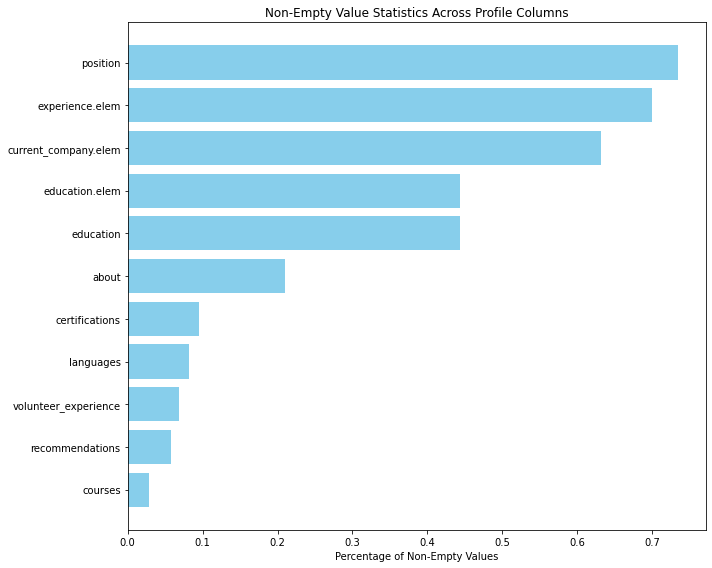

In [0]:
import matplotlib.pyplot as plt

# Convert column_statistics dictionary into lists for plotting and sort them
columns = list(column_statistics.keys())
values = list(column_statistics.values())
sorted_indices = sorted(range(len(values)), key=lambda k: values[k])
sorted_columns = [columns[i] for i in sorted_indices]
sorted_values = [values[i] for i in sorted_indices]

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(sorted_columns, sorted_values, color='skyblue')
plt.xlabel('Percentage of Non-Empty Values')
plt.title('Non-Empty Value Statistics Across Profile Columns')
plt.tight_layout()
plt.show()

## Prepare new data set for anlysis

We will use the folowing data:
* about - a new df (only 20% not null)
* current_company
* education
* experience
* position

In [0]:
selected_columns = [
    'id',  # for statistics usage and table join
    'about',
    'current_company.name AS current_company_name',
    'current_company.industry AS current_company_industry',
    'current_company.title AS current_company_title',
    'education.degree AS education_degree',  # Level of degree (+)
    'education.field AS education_field',  # Importent for measurement ! (+)
    'education.title AS education_title',  # University name (+)
    'educations_details',
    'experience.company AS experience_company',  # company name
    'experience.description AS experience_description', # very importent for measurement !!! (+)
    'experience.positions.description AS experience_positions_description', # very importent for measurement !!! (+)
    'experience.positions.title AS experience_positions_title', # very importent for measurement !!! (+)
    'experience.positions.subtitle AS experience_positions_subtitle', # Importent for measurement !!! (+)
    'position',  # position title (+)
]

# Add column named employed 0 or 1 based on current company name
df = profiles.selectExpr(selected_columns).withColumn('employed', when(col('current_company_name').isNull(), 0).otherwise(1))

### Filter missing values

In [0]:
from pyspark.sql.functions import when, col, size, flatten, array_contains

df_statistics = {}

In [0]:
# Filter about non null
about_df = df.filter(df['about'].isNotNull())
about_df = about_df.select('id', 'about')
df_statistics['about_df'] = about_df.count()
# about_df.display()

In [0]:
# Filter position
column_name = 'position'
position_df = df.filter(df[column_name].isNotNull() & (df[column_name] != '--')).select('id', 'position')  # about 2.5M records
df_statistics['position_df'] = position_df.count()
# position_df.display()

In [0]:
# Filter education
column_name = 'education_field'
education_df = df.filter(df[column_name].isNotNull() & (size(df[column_name]) > 0) & ~(array_contains(df[column_name], 'null')))  # about 800K records 
education_df = education_df.select('id', 'education_degree', 'education_field', 'education_title', 'educations_details')
df_statistics['education_df'] = education_df.count()
# education_df.display()

In [0]:
# Filter experience
column_name = 'experience_positions_title'
experience_df = df.filter(df[column_name].isNotNull() & (size(df[column_name]) > 0))
experience_df = experience_df.filter(~(array_contains(df[column_name][0], 'null')))  # about 250K records 
experience_df = experience_df.select('id', 'experience_company', 'experience_description', 'experience_positions_description', 'experience_positions_title', 'experience_positions_subtitle')
df_statistics['experience_df'] = experience_df.count()
# experience_df.display()

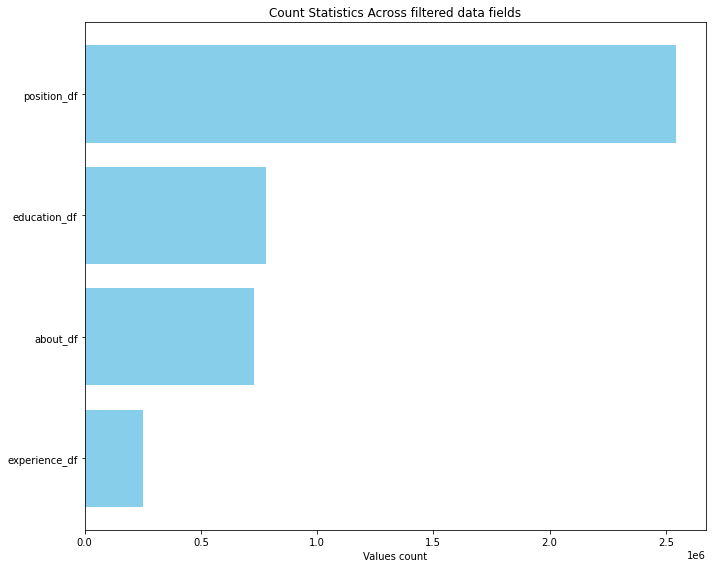

In [0]:
import matplotlib.pyplot as plt

# Convert df_statistics dictionary into lists for plotting and sort them
columns = list(df_statistics.keys())
values = list(df_statistics.values())
sorted_indices = sorted(range(len(values)), key=lambda k: values[k])
sorted_columns = [columns[i] for i in sorted_indices]
sorted_values = [values[i] for i in sorted_indices]

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(sorted_columns, sorted_values, color='skyblue')
plt.xlabel('Values count')
plt.title('Count Statistics Across filtered data fields')
plt.tight_layout()
plt.show()

### Join tables and fix columns

In [0]:
from pyspark.sql.functions import col, lower, regexp_extract
from pyspark.sql.types import StringType

In [0]:
# Step 1: Filter position_df and about_df
filtered_position_df = position_df.filter(lower(col("position")).like("%stud%") 
                                          & ~lower(col("position")).like("%studio%")
                                          )
filtered_about_df = about_df.filter(lower(col("about")).like("%stud%") 
                                    & ~lower(col("about")).like("%studio%")
                                    )

print(f"{filtered_position_df.count(), filtered_about_df.count() = }")

filtered_position_df.count(), filtered_about_df.count() = (155856, 82485)


In [0]:
# Step 2: Join filtered position_df and about_df
joined_df = filtered_position_df.join(filtered_about_df, "id", "outer")
joined_df.count()

Out[103]: 215028

In [0]:
joined_df.display()

id position about %C3%B3%C3%A3%C3%A7-%C3%B3%C3%A3%C3%A7-8982497 Student at Ain Shams University null %D0%BC%D0%B8%D0%BB%D0%B0-%D0%B6%D0%B8%D1%85%D0%B0%D1%80%D0%B5%D0%B2%D0%B0-b26965115 Student at ABC null %D7%90%D7%99%D7%95%D7%91-%D7%9C%D7%99%D7%9C-a131a2a7 Student at University of Haifa null %D8%A7%D8%AD%D9%85%D8%AF-%D8%A7%D9%84%D8%B1%D9%85%D8%A7%D8%AD%D9%8A-963647b3 Student at Universitas Ahmad Dahlan null %D8%A7%D9%8A%D9%85%D9%86-%D8%A7%D9%84%D8%BA%D8%A7%D9%85%D8%AF%D9%8A-167a64138 Student at University of Missouri-Kansas City null %D8%B2%D8%A8%D9%86-%D8%A7%D9%84%D8%AC%D8%B4%D8%B9%D9%85%D9%8A-%D8%A3%D8%A8%D9%88-%D8%B3%D8%B9%D8%AF-99322548 Student at Springfield College null %D8%B9%D8%A8%D8%AF%D8%A7%D9%84%D8%B1%D8%AD%D9%85%D9%86-%D8%A7%D9%84%D8%B9%D9%86%D9%82%D8%B1%D9%8A-5b733189 Student at University of Washington null %D8%B9-%D9%80%D9%80%D9%80%D9%80%D9%80%D9%80%D8%A8%D8%AF%D8%A7%D9%84%D9%84%D9%87-%D8%A7%D9%84%D9%80%D9%80%D9%80-%D8%A7%D9%84%D8%B9%D9%86%D8%B2%D9%8A-a9748760 Student at UCAL null %D9%85%D8%AD%D9%85%D8%AF-%D8%A7%D9%84%D8%B5%D8%A7%D9%84%D8%AD-b4b6a43b Student at WKU null %D9%85%D8%AD%D9%85%D8%AF-%D8%B5%D8%A7%D8%AF%D9%82-%D8%A7%D9%84%D8%BA%D8%B2%D8%A7%D9%84-sadeq-121a3943 Student at Sam Houston State University null %E0%B8%8A%E0%B8%99%E0%B8%9B%E0%B8%97%E0%B8%B4%E0%B8%99-%E0%B9%84%E0%B8%9E%E0%B8%9A%E0%B8%B9%E0%B8%A5%E0%B8%A2%E0%B9%8C%E0%B8%9E%E0%B8%A5%E0%B8%B2%E0%B8%A2%E0%B9%89%E0%B8%AD%E0%B8%A2-03821226 Student at The University of Texas at Austin null %E2%99%AB%E2%98%86%C6%B9%CC%B5%CC%A1%D3%9D%CC%B5%CC%A8%CC%84%CA%92%E2%99%A5%E2%99%A5%E1%83%A6%E2%99%A5%E1%83%A6-r3s3-%E2%99%AB%E2%98%86%C6%B9%CC%B5%CC%A1%D3%9D%CC%B5%CC%A8%CC%84%CA%92%E2%99%A5%E2%99%A5%E1%83%A6%E2%99%A5%E1%83%A6-9101104a Student at Los Angeles Trade Technical College null %E4%B8%80%E5%93%B2-%E8%8B%8F-024048181 Student null %E5%87%AF%E9%A3%8E-%E5%88%98-0398288b Student at The Ohio State University null %E5%88%98%E6%B3%93%E6%B1%A0-steven-liu-791b3994 Graduate student at Golden Gate University null %E5%98%89%E7%94%A6-%E5%8F%B6-7a10b7129 null Jiasu was born in Xuzhou, China. He studied photography in Sichuan University of Media and Communications, and then moved to Los Angeles to learn Filmmaking in New York Film Academy. During his studies at The New York Film Academy, Jiasu has wrote and directed several short films, such as Pasta, Love Story, Hotline. Meanwhile, he works hard making other films, music videos and advertisements. Jiasu Ye possesses excellent leadership, organization and coordination skills. He has editing film interviews and written movie reviews to publish in the entertainment section of Chinese Tencent Network since the year 2015. %E5%98%89%E8%94%9A-%E9%82%B9-8b282568 Student at none null %E5%A4%A9%E6%88%90-%E9%99%88-469a991a2 Computer Game Science and Computer Science major senior student in UCI. null %E5%AD%90%E6%96%87-%E7%99%BD-84b60a134 null When I was a freeman at Beijing Jiaotong University, I studied in School of Computer and Information Technology, from which I got basic programming ability. After changing major to Finance, I skilled in using SPSS, Eviews and Bloomberg. I have an internship experience in Agricultural Bank of China, communicating with customers to know their risk appetite and assisting introduce financial products to them. At leisure, I would like to read some finance reports, work out and draw pictures. %E5%AE%9D%E4%BB%AA-%E9%BB%84-74b6b7b7 University of Delaware (studying, not graduate) — 学生 null %E5%B0%8F%E9%BB%83%E9%AD%9A-huang-67160147 Student at Haha null %E6%A2%93%E6%99%97-%E6%9D%A8-1b9900120 null 1．Easy-going and congenial, with a strong sense of responsibility and good team-spirit. 2．Completed all the courses in the specialized field, obtaining good command of theoretic knowledge and experimental and DIY skill; Very adaptable and Good at leaning. 3．Having played a couple important roles in the student organizations, honing the interpersonal communication skills and： organizational capability. 4．Havin

In [0]:
# Get employed values
employed_df = df.select('id', 'employed')

In [0]:
# Step 3: Join with education_df and experience_df
student_df = joined_df \
    .join(education_df, "id", "left") \
    .join(experience_df, "id", "left") \
    .join(employed_df, "id", "left")

student_df.count()

Out[153]: 215028

In [0]:
from pyspark.sql.functions import col, concat_ws, split, expr

# Convert column from array to string
student_df = student_df.withColumn("education_degree", concat_ws(", ", col("education_degree")))
student_df = student_df.withColumn("education_field", concat_ws(", ", col("education_field")))
student_df = student_df.withColumn("education_title", concat_ws(", ", col("education_title")))
student_df = student_df.withColumn("experience_company", concat_ws(", ", col("experience_company")))
student_df = student_df.withColumn("experience_description", concat_ws(", ", col("experience_description")))

# Convert column from array of arrays to string
student_df = student_df.withColumn("experience_positions_description", 
                                   expr("transform(experience_positions_description, x -> concat_ws(', ', x))"))
student_df = student_df.withColumn("experience_positions_description", concat_ws(", ", col("experience_positions_description")))

student_df = student_df.withColumn("experience_positions_title", 
                                   expr("transform(experience_positions_title, x -> concat_ws(', ', x))"))
student_df = student_df.withColumn("experience_positions_title", concat_ws(", ", col("experience_positions_title")))

student_df = student_df.withColumn("experience_positions_subtitle", 
                                   expr("transform(experience_positions_subtitle, x -> concat_ws(', ', x))"))
student_df = student_df.withColumn("experience_positions_subtitle", concat_ws(", ", col("experience_positions_subtitle")))

In [0]:
student_df.display()

id position about education_degree education_field education_title educations_details experience_company experience_description experience_positions_description experience_positions_title experience_positions_subtitle employed %C3%B3%C3%A3%C3%A7-%C3%B3%C3%A3%C3%A7-8982497 Student at Ain Shams University null null 0 %D0%BC%D0%B8%D0%BB%D0%B0-%D0%B6%D0%B8%D1%85%D0%B0%D1%80%D0%B5%D0%B2%D0%B0-b26965115 Student at ABC null null 0 %D7%90%D7%99%D7%95%D7%91-%D7%9C%D7%99%D7%9C-a131a2a7 Student at University of Haifa null null 0 %D8%A7%D8%AD%D9%85%D8%AF-%D8%A7%D9%84%D8%B1%D9%85%D8%A7%D8%AD%D9%8A-963647b3 Student at Universitas Ahmad Dahlan null null 0 %D8%B2%D8%A8%D9%86-%D8%A7%D9%84%D8%AC%D8%B4%D8%B9%D9%85%D9%8A-%D8%A3%D8%A8%D9%88-%D8%B3%D8%B9%D8%AF-99322548 Student at Springfield College null null 0 %D8%B9-%D9%80%D9%80%D9%80%D9%80%D9%80%D9%80%D8%A8%D8%AF%D8%A7%D9%84%D9%84%D9%87-%D8%A7%D9%84%D9%80%D9%80%D9%80-%D8%A7%D9%84%D8%B9%D9%86%D8%B2%D9%8A-a9748760 Student at UCAL null null 0 %D9%85%D8%AD%D9%85%D8%AF-%D8%A7%D9%84%D8%B5%D8%A7%D9%84%D8%AD-b4b6a43b Student at WKU null null 0 %E2%99%AB%E2%98%86%C6%B9%CC%B5%CC%A1%D3%9D%CC%B5%CC%A8%CC%84%CA%92%E2%99%A5%E2%99%A5%E1%83%A6%E2%99%A5%E1%83%A6-r3s3-%E2%99%AB%E2%98%86%C6%B9%CC%B5%CC%A1%D3%9D%CC%B5%CC%A8%CC%84%CA%92%E2%99%A5%E2%99%A5%E1%83%A6%E2%99%A5%E1%83%A6-9101104a Student at Los Angeles Trade Technical College null null 0 %E4%B8%80%E5%93%B2-%E8%8B%8F-024048181 Student null Bachelor's degree Hospitality Business Michigan State University - Eli Broad College of Business Michigan State University - Eli Broad College of Business 0 %E5%98%89%E7%94%A6-%E5%8F%B6-7a10b7129 null Jiasu was born in Xuzhou, China. He studied photography in Sichuan University of Media and Communications, and then moved to Los Angeles to learn Filmmaking in New York Film Academy. During his studies at The New York Film Academy, Jiasu has wrote and directed several short films, such as Pasta, Love Story, Hotline. Meanwhile, he works hard making other films, music videos and advertisements. Jiasu Ye possesses excellent leadership, organization and coordination skills. He has editing film interviews and written movie reviews to publish in the entertainment section of Chinese Tencent Network since the year 2015. Bachelor of Fine Arts (BFA) Filmmaking New York Film Academy, Los Angeles New York Film Academy, Los Angeles 0 %E5%98%89%E8%94%9A-%E9%82%B9-8b282568 Student at none null null 0 %E5%AD%90%E6%96%87-%E7%99%BD-84b60a134 null When I was a freeman at Beijing Jiaotong University, I studied in School of Computer and Information Technology, from which I got basic programming ability. After changing major to Finance, I skilled in using SPSS, Eviews and Bloomberg. I have an internship experience in Agricultural Bank of China, communicating with customers to know their risk appetite and assisting introduce financial products to them. At leisure, I would like to read some finance reports, work out and draw pictures. Master's degree, Bachelor's degree Finance, Finance Tulane University - A.B. Freeman School of Business, Beijing Jiaotong University Tulane University - A.B. Freeman School of Business 0 %E5%AE%9D%E4%BB%AA-%E9%BB%84-74b6b7b7 University of Delaware (studying, not graduate) — 学生 null null 0 %E5%B0%8F%E9%BB%83%E9%AD%9A-huang-67160147 Student at Haha null null 0 %E6%B1%9D%E6%B6%9B-%E9%BE%9A-b00923257 null After returning to China after studying abroad, traveled for six months, then started working in the family company, through their own efforts, step by step promoted to operations director, due to the desire for freedom, in 2019 began to open their own beauty company, due to the impact of the epidemic business is not good, in 2022 came to the United States to expand the market, and is responsible for the business and development of the family company in North America Master's degree, Bachelors Degree Business and Financial Management, Business and Financial Management Université Paris Dauphine - PSL, Sun Yat-sen Universi

## Save results

In [0]:
import pickle

pickle_path = "/Workspace/Users/shalom2552@campus.technion.ac.il/project/student_df.pickle"
with open(pickle_path, "wb") as f:
    pickle.dump(student_df.collect(), f)